# 복습

### 예제: 시애틀 자전거 수 시각화

In [15]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;
from datetime import datetime

In [29]:
url = ('https://raw.githubusercontent.com/DataScienceWorks/PredictingBicycleTraffic/master/data/FremontBridge.csv')
!curl -0 {url}

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291
10/03/2012 09:00:00 AM,104,172
10/03/2012 10:00:00 AM,46,72
10/03/2012 11:00:00 AM,32,10
10/03/2012 12:00:00 PM,41,35
10/03/2012 01:00:00 PM,48,42
10/03/2012 02:00:00 PM,51,77
10/03/2012 03:00:00 PM,92,72
10/03/2012 04:00:00 PM,182,133
10/03/2012 05:00:00 PM,391,192
10/03/2012 06:00:00 PM,258,122
10/03/2012 07:00:00 PM,69,59
10/03/2012 08:00:00 PM,51,29
10/03/2012 09:00:00 PM,38,25
10/03/2012 10:00:00 PM,25,24
10/03/2012 11:00:00 PM,12,5
10/04/2012 12:00:00 AM,11,7
10/04/2012 01:00:00 AM,0,3
10/04/2012 02:00:00 AM,6,3
10/04/2012 03:00:00 AM,3,0
10/04/2012 04:00:00 AM,1,7
10/04/2012 05:00:00 AM,11,15
10/04/2012 06:00:00 AM,51,91
10/04/2012 07:00:00 AM,89,230
10/04/2012 08:00

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 57 1412k   57  811k    0     0  1365k      0  0:00:01 --:--:--  0:00:01 1367k
100 1412k  100 1412k    0     0  2052k      0 --:--:-- --:--:-- --:--:-- 2055k


07/21/2013 10:00:00 PM,14,21
07/21/2013 11:00:00 PM,16,20
07/22/2013 12:00:00 AM,6,8
07/22/2013 01:00:00 AM,2,1
07/22/2013 02:00:00 AM,3,1
07/22/2013 03:00:00 AM,2,1
07/22/2013 04:00:00 AM,2,7
07/22/2013 05:00:00 AM,15,23
07/22/2013 06:00:00 AM,46,107
07/22/2013 07:00:00 AM,89,253
07/22/2013 08:00:00 AM,143,319
07/22/2013 09:00:00 AM,115,214
07/22/2013 10:00:00 AM,75,78
07/22/2013 11:00:00 AM,36,48
07/22/2013 12:00:00 PM,47,55
07/22/2013 01:00:00 PM,63,59
07/22/2013 02:00:00 PM,57,68
07/22/2013 03:00:00 PM,91,90
07/22/2013 04:00:00 PM,189,106
07/22/2013 05:00:00 PM,434,199
07/22/2013 06:00:00 PM,314,168
07/22/2013 07:00:00 PM,174,116
07/22/2013 08:00:00 PM,92,75
07/22/2013 09:00:00 PM,54,42
07/22/2013 10:00:00 PM,33,25
07/22/2013 11:00:00 PM,19,10
07/23/2013 12:00:00 AM,13,6
07/23/2013 01:00:00 AM,1,7
07/23/2013 02:00:00 AM,1,4
07/23/2013 03:00:00 AM,0,4
07/23/2013 04:00:00 AM,3,6
07/23/2013 05:00:00 AM,14,28
07/23/2013 06:00:00 AM,52,107
07/23/2013 07:00:00 AM,103,312
07/23/2013 08:00

In [37]:

# 날짜 형식을 지정하는 함수
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

data = pd.read_csv(url, index_col='Date', parse_dates=True)
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_3740\1508137017.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(url, index_col='Date', parse_dates=True)


Fremont Bridge East Sidewalk  \
Date                                                
2012-10-03 00:00:00                           9.0   
2012-10-03 01:00:00                           6.0   
2012-10-03 02:00:00                           1.0   
2012-10-03 03:00:00                           3.0   
2012-10-03 04:00:00                           1.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2012-10-03 00:00:00                           4.0  
2012-10-03 01:00:00                           4.0  
2012-10-03 02:00:00                           1.0  
2012-10-03 03:00:00                           2.0  
2012-10-03 04:00:00                           6.0

In [38]:
data.columns = ['East', 'West']

In [39]:
data['Total'] = data['East'] + data['West']

In [41]:
new_order = ['Total', 'West', 'East']
data = data[new_order]

In [42]:
data.head()

Total  West  East
Date                                  
2012-10-03 00:00:00   13.0   4.0   9.0
2012-10-03 01:00:00   10.0   4.0   6.0
2012-10-03 02:00:00    2.0   1.0   1.0
2012-10-03 03:00:00    5.0   2.0   3.0
2012-10-03 04:00:00    7.0   6.0   1.0

# 4장_Matplotlib을 활용한 시각화

## 일반적인 Matplotlib 사용법

### matplotlib 임포트 하기

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### 스타일 설정하기

In [62]:
plt.style.use('classic')

## show()를 사용할 것인가, 말 것인가 - 플롯 표현 방법

+ 스크립트에서 플로팅하기

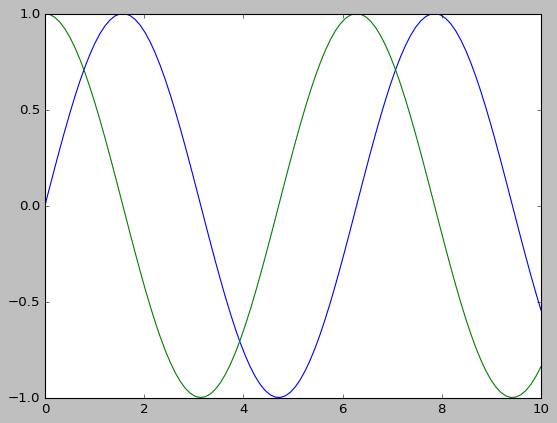

In [65]:
# ----- file: myplot.py -----
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

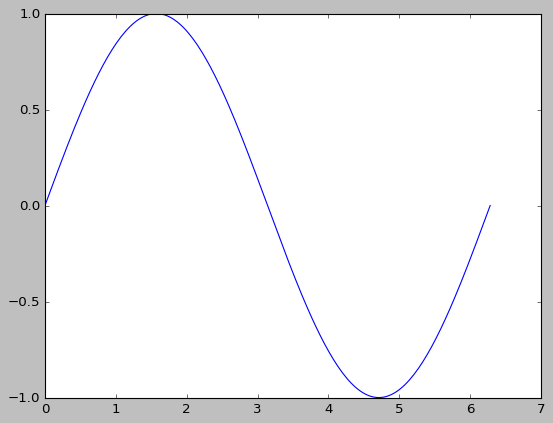

In [63]:
# Getting Started
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

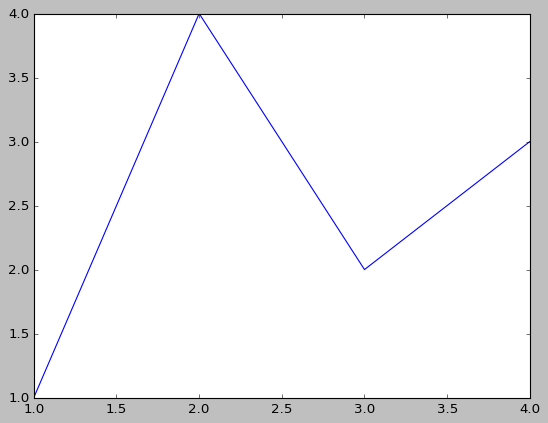

In [64]:
# Quick Start
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the Axes.
plt.show()                           # Show the figure.

+ IPython 셸에서 플로팅하기

In [49]:
# %matplotlib
# Using matplotlib backend: TkAgg

In [50]:
# import matplotlib.pyplot as plt

+ Jupyter 노트북에서 플로팅하기

In [71]:
%matplotlib inline

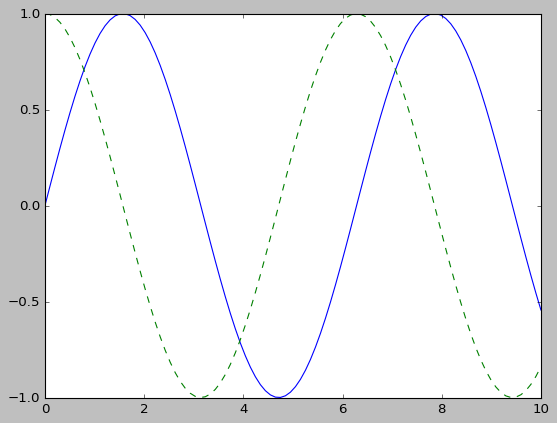

In [72]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

+ 그림을 파일로 저장하기

In [73]:
fig.savefig('my_figure.png')

In [74]:
# !ls-lh my_figure.png
# -rw-r--r-- 1 jakevdp staff 16K July 02 15:00 my_figure.png

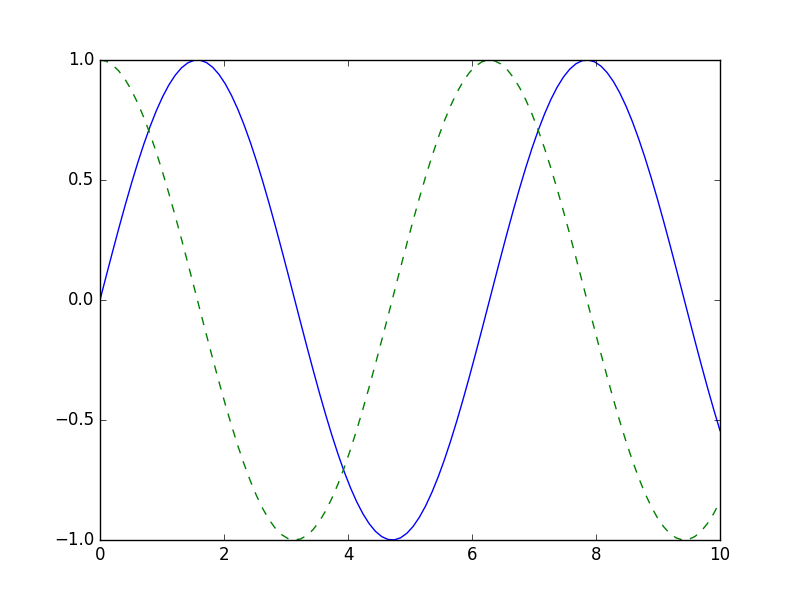

In [75]:
from IPython.display import Image
Image('my_figure.png')

In [76]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

+ 하나 가격에 인터페이스 두개

+ 매트랩 스타일의 인터페이스

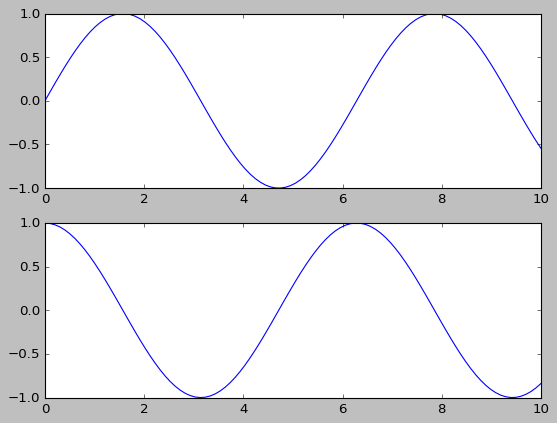

In [77]:
plt.figure() # 플롯 그림을 생성
# 두 개의 패널 중 첫 번째 패널을 생성하고 현재 축(axis)을 설정
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# 두 번째 패널을 생성하고 현재 축(axis)을 설정
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

In [78]:
# 결과 : 이 인터페이스는 상태를 저장한다는 것이 중요
# 모든 plt 명령어가 적용되는 곳에 있는 "현재" 그림과 축을 기록
# 간단한 플롯에서는 빠르고 편리하지만 문제가 발생할 소지가 많음 ex) 두 번째 패널이 생성되고 나면 어떻게 첫 번째 패널로 돌아가 뭔가를 추가할 수 있을까?
# 방법이 다소 투박

+ 객체지향 인터페이스

In [79]:
# 복잡한 상황과 그림을 좀 더 많이 제어하고 싶을 때
# 객체지향 인터페이스에서 플로팅함수는 '활성화된' 그림이나 축의 개념에 의존하지 않는 명시적인 Figure와 Axes 객체의 메서드

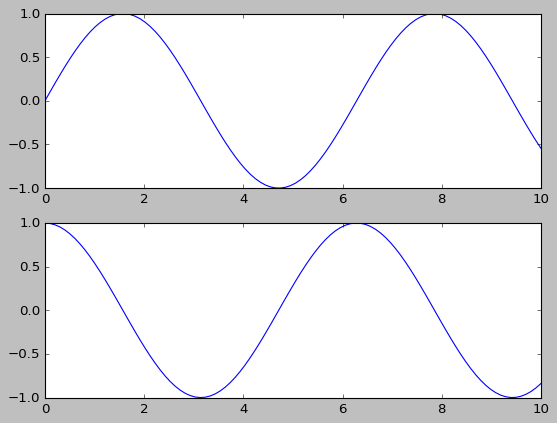

In [81]:
# 먼저 플롯 그리드를 생성
# ax는 두 개의 축 객체의 배열이 됨
fig, ax = plt.subplots(2)

# 적절한 객체에서 plot() 메서드를 호출
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

## 간단한 라인 플롯

In [83]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

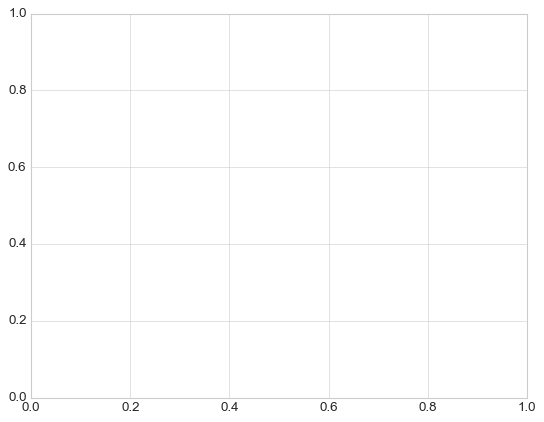

In [87]:
# Matplotlib에서 그림(plt.Figure 클래스의 인스턴스)은 축과 그래픽, 텍스트, 레이블을 표시하는 모든 객체를 포함하는 하나의 컨테이너로 생각
# 축(plt.Axes 클래스의 인스턴스)은 위에서 본 것처럼 눈금과 레이블이 있는 테두리 상자로 나중에 시각화를 형성하는 플롯 요소를 포함
# 변수 이름 fig : 그림 인스턴스 , ax : 축 인스턴스
# 축을 만들고 나면 ax.plot 함수를 사용해 일부 데이터를 플로팅 가능
fig = plt.figure()
ax = plt.axes()

<Figure size 640x480 with 0 Axes>

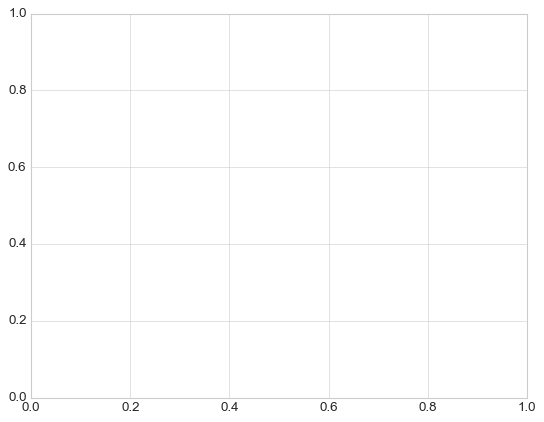

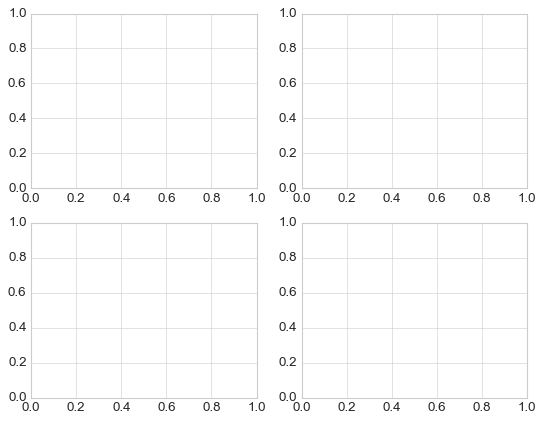

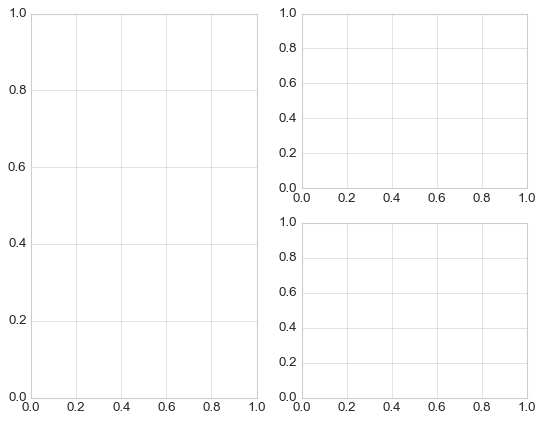

In [88]:
fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

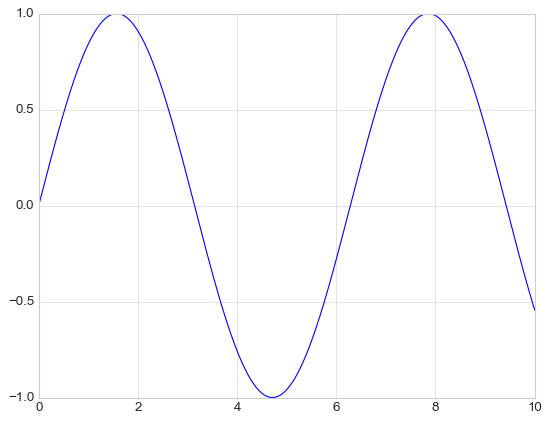

In [91]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));
# 코드 마지막 줄의 세미콜론은 의도적으로 넣은 것, 출력에서 플롯의 텍스트 부분을 숨김

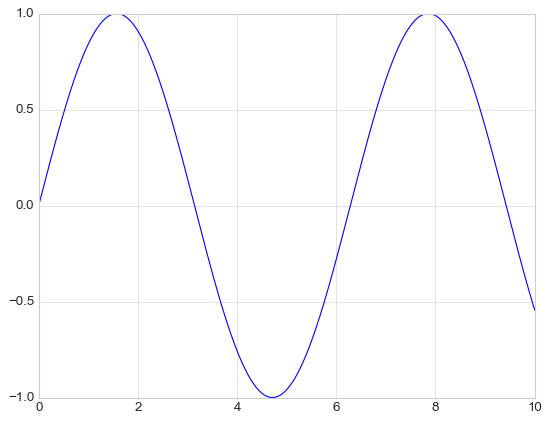

In [92]:
# 파이랩(pylab) 인터페이스를 사용, 그림과 축이 백그라운드에 만들어지게 가능
plt.plot(x, np.sin(x));

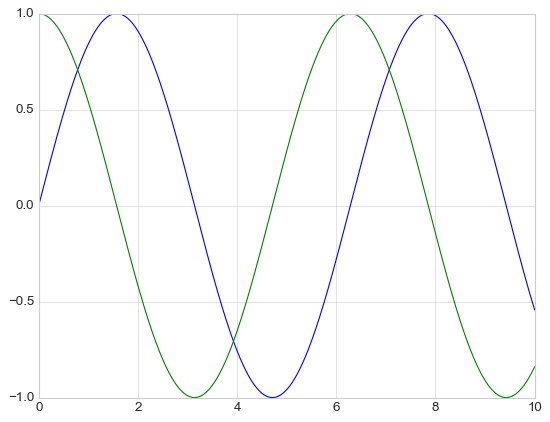

In [93]:
# 여러 개의 선을 가진 그림 하나를 만들고 싶으면 plot 함수를 여러 번 호출하기만 하면 됨
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

### 플롯 수정하기: 선 색상과 스타일

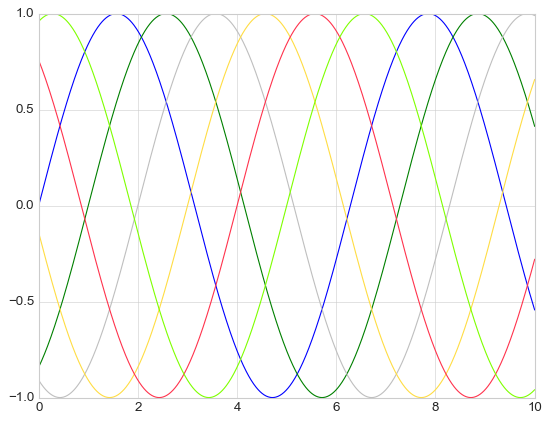

In [95]:
# 색상 지정 방식
plt.plot(x, np.sin(x - 0), color='blue')    # 색상을 이름으로 지정
plt.plot(x, np.sin(x - 1), color='g')       # 짧은 색상 코드(rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')    # 0과 1 사이로 회색조 지정
plt.plot(x, np.sin(x - 3), color='#FFDD44') # 16진수 코드 (RRGGBB, 00~FF 사이)
plt.plot(x, np.sin(x - 4), color=(1.0, 0.2, 0.3)) # RGB 튜플, 0과 1 값
plt.plot(x, np.sin(x - 5), color='chartreuse')    # 모든 HTML 색상 이름을 지원

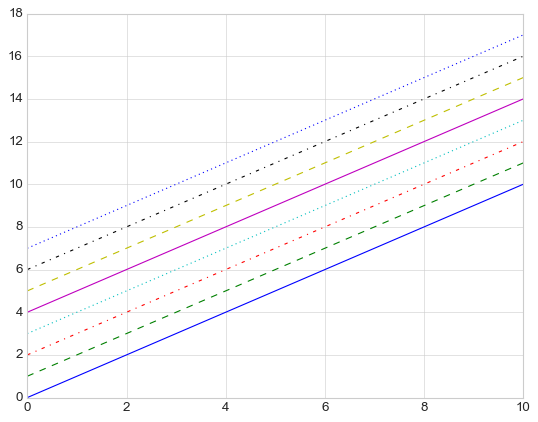

In [97]:
# 아무 색도 지정하지 않으면 Matplotlib이 여러 줄에 대해 자동으로 기본 색상 집합을 돌아가며 색상을 채택
# linestyle 키워드를 사용, 선 스타일을 조정
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

# 축약형으로 다음 코드를 사용할 수 있음
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':')  # dotted

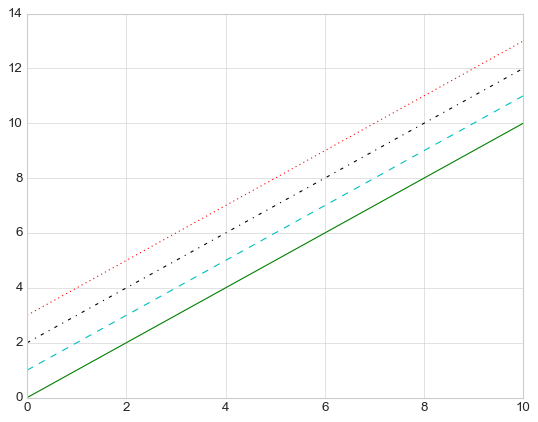

In [98]:
# 간결하게 지정하고 싶다면 linestyle과 color 코드를 키워드가 없는 단일 인수로 결합해서 plt.plot() 함수에 전달
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r')  # dotted red

In [99]:
# 단일 문자로 된 색상 코드는 디지털 색상 그래픽에 보편적으로 사용되는 RGB(Red, 빨강 / Green, 녹색 / Blue, 파랑)와 CMYK(Cyan, 청록 / Magenta, 자홍 / Yellow, 노랑 / blacK, 검정) 색상 체계의 표준 약어를 반영

### 플롯 조정하기: 축 경계

In [101]:
# Matplotlib은 기본적으로 축 경계를 적절하게 선택하지만, 좀 더 세밀한 제어가 필요
# 가장 기본적인 방식은 plt.xlim()과 plt.ylim() 메서드

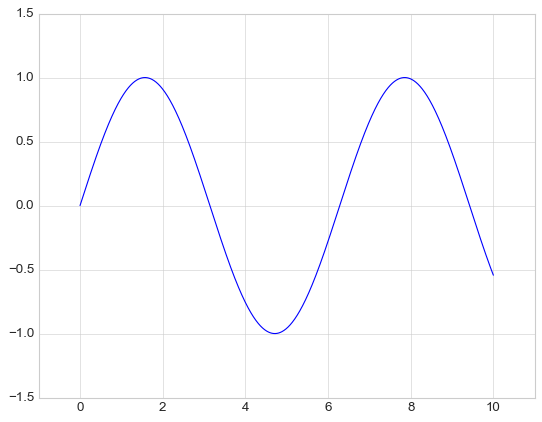

In [102]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

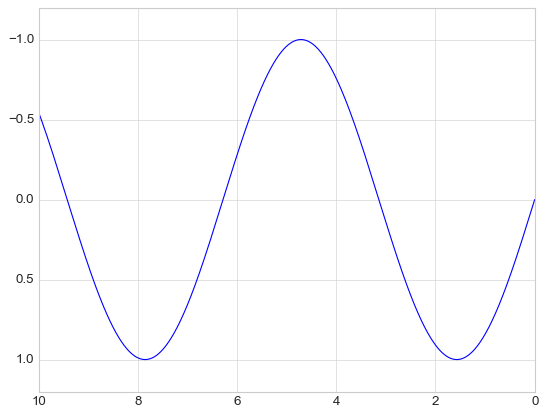

In [103]:
# 역으로 표시 : 인수의 순서를 바꿈
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

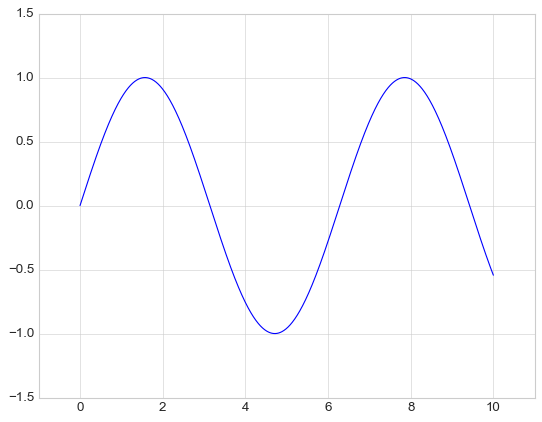

In [104]:
# 유용한 메서드는 plt.axis() 메서드 [x축 최솟값, x축 최댓값, y축 최솟값, y축 최댓값]을 지정하는 리스트를 전달해 한 번의 호출로 x와 y 축의 경계를 설정
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

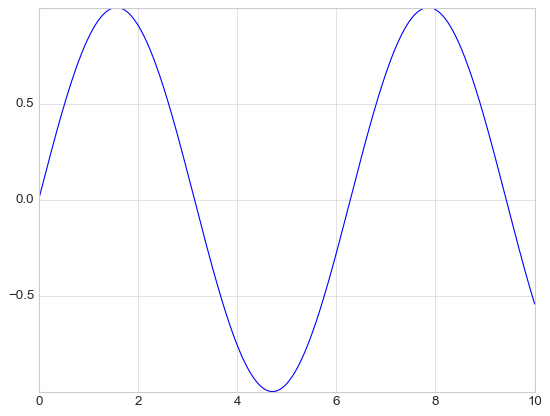

In [105]:
# plt.axis() 메서드를 이용하면 이를 넘어서 현재 플롯 주변의 경계를 자동으로 더 밀착시키는 등의 작업 가능
plt.plot(x, np.sin(x))
plt.axis('tight');

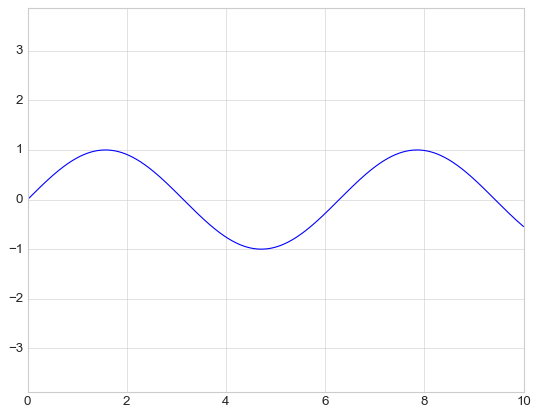

In [106]:
# 좀 더 높은 단계의 지정도 가능, 가로세로 비율을 균등하게 설정해 화면상에 x 축의 한 단위와 y축의 한 단위가 똑같게 설정하는 등의 작업 가능
plt.plot(x, np.sin(x))
plt.axis('equal');

### 플롯에 레이블 붙이기

Text(0, 0.5, 'sin(x)')

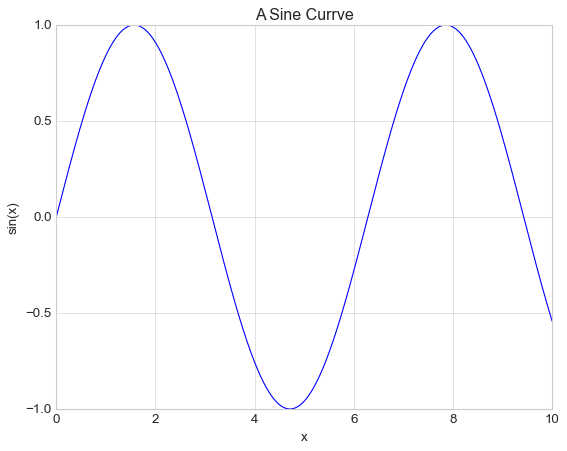

In [107]:
# 제목과 축 레이블, 간단한 범례
plt.plot(x, np.sin(x))
plt.title("A Sine Currve")
plt.xlabel("x")
plt.ylabel("sin(x)")

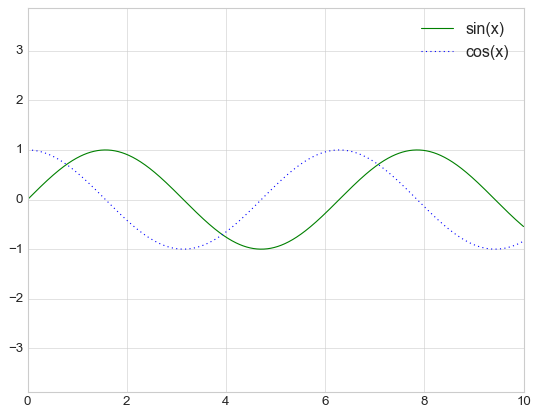

In [115]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

### Matplotlib 주의사항

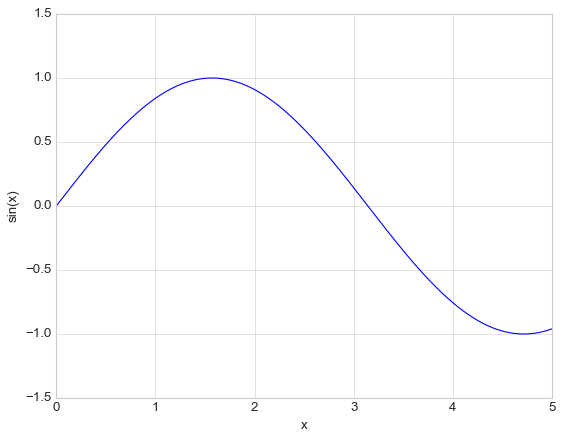

In [117]:
ax = plt.axes()
ax.set_xlim([0, 5])
ax.set_ylim([-1.5, 1.5])
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")
ax.plot(x, np.sin(x))

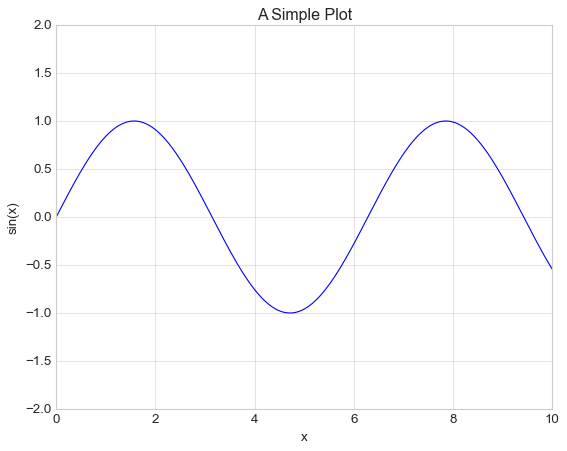

In [118]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='sin(x)', title='A Simple Plot');

## 간단한 산점도

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

## plt.plot을 사용한 산점도

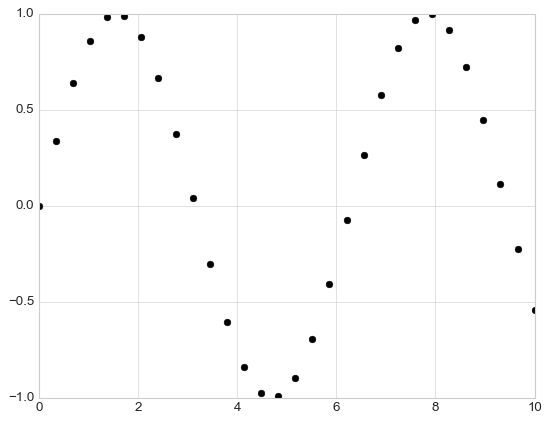

In [141]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')
# 함수 호출 세 번째 인수는 플로팅에 사용될 기호 유형을 나타내는 문자
# '-'와 '--'와 같은 옵션을 지정해 선 스타일을 제어할 수 있듯이 표시자(marker) 스타일도 짧은 문자열 코드를 가지고 있음

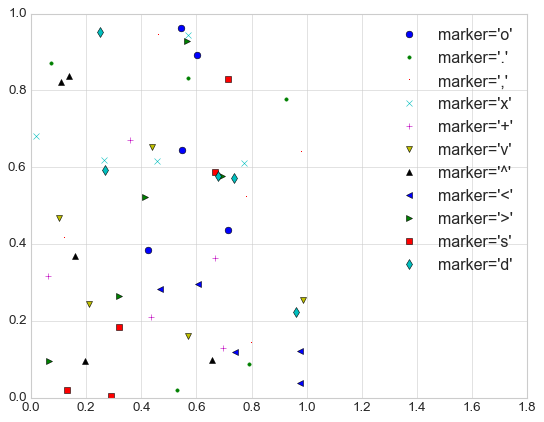

In [142]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker), ls='None')
    plt.legend(numpoints=1)
    plt.xlim(0, 1.8);

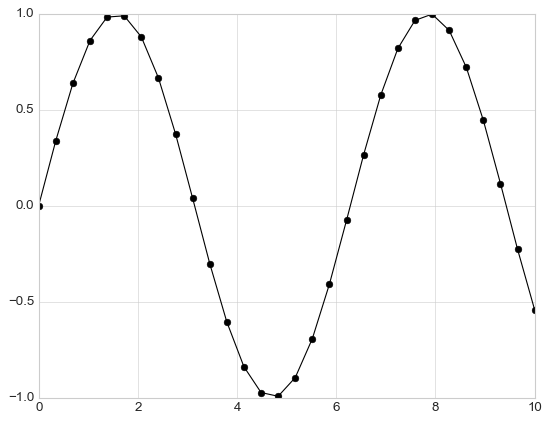

In [143]:
# 이보다 더 많이 사용되는 방식은 이 문자 코드를 선과 색상 코드와 함께 사용해 점들을 그 연결선과 함께 플로팅하는 것
plt.plot(x, y, '-ok'); # 선(-), 원 표시 기호(o), 검정색(k)

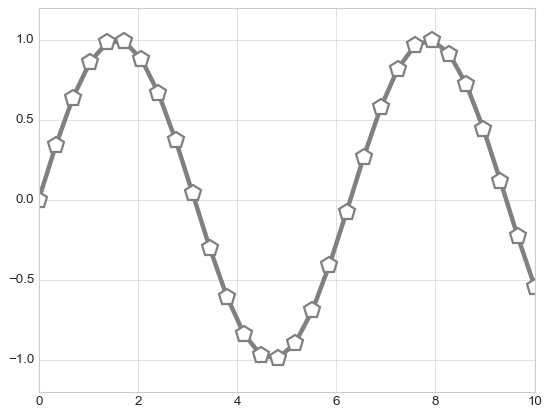

In [144]:
# plt.plot의 키워드 인수는 다양한 선과 표시 속성을 지정
plt.plot(x, y, '-p', color='gray',
        markersize=15, linewidth=4,
        markerfacecolor='white',
        markeredgecolor='gray',
        markeredgewidth=2)
plt.ylim(-1.2, 1.2);

### plt.scatter를 활용한 산점도

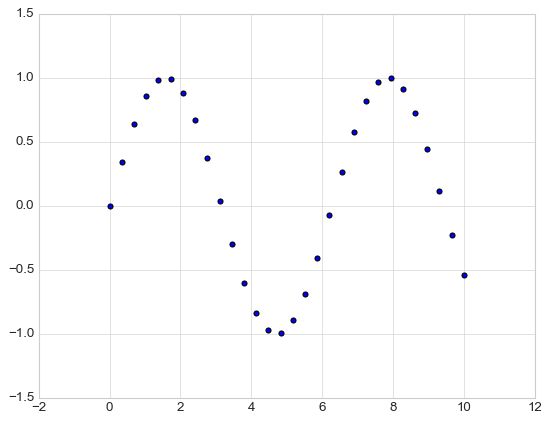

In [125]:
# 두 번째로 산점도를 만들어 내는 더 강력한 메서드로 plt.plot 함수와 매우 비슷하게 사용할 수 있는 plt.scatter 함수가 있음
plt.scatter(x, y, marker='o')

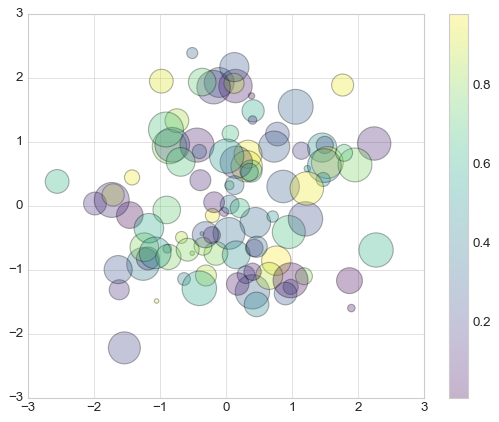

In [126]:
# plt.scatter 와 plt.plot의 주요 차이점 : plt.scatter의 경우 각 점의 속성(크기, 표면 색상, 테두리 색상 등)을 개별적으로 제어하거나 데이터에 매핑할 수 있는 산점도를 만드는 데 사용 가능
# 다양한 색상과 크기를 갖는 점으로 이뤄진 임의의 산점도, 겹친 결과를 더 잘 보여주기 위해 alpha 키워드를 사용해 투명도를 조정
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors =rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(); # 색상 척도 표시

In [127]:
# 색상 인수는 색상 척도에 자동으로 매핑(colorbar() 명령어에서 보여줌)되며 크기 인수는 픽셀 단위로 주어짐
# 다차원 데이터를 표시하기 위해 점의 색상과 크기를 사용해 정보를 전달 가능

In [130]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.2/11.0 MB 6.3 MB/s eta 0:00:02
   - -------------------------------------- 0.4/11.0 MB 5.5 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.0 MB 5.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 5.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.0 MB 5.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.0 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/11.0 MB 5.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/11.0 MB 5.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.0 MB 5.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/11.0 MB 5.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/11.0 MB 5.5 MB/s eta 0:00:02
   ---------- ----------------------------- 3.0/11.0 MB 5.5 MB/s eta 0:00:02
   ---

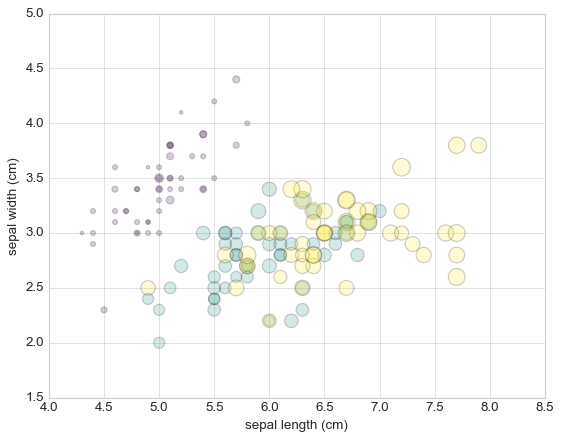

In [147]:
# Scikit-Learn에서 제공하는 붓꽃 데이터
# 각 표본은 세가지 유형의 꽃 중 하나로 그 꽃잎과 꽃받침의 크기를 세밀하게 측정한 값을 가지고 있음
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [149]:
data.shape

(150, 5)

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

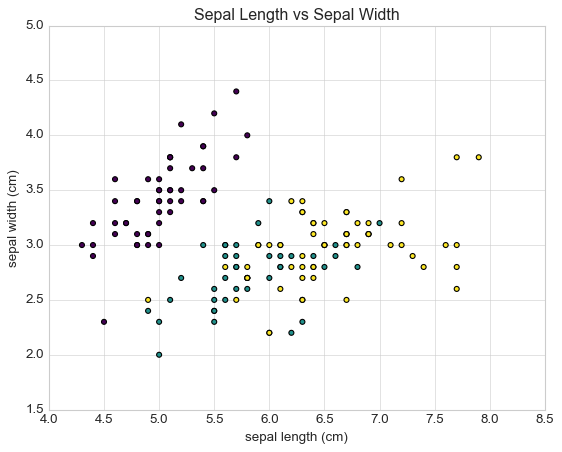

In [154]:
fig, ax = plt.subplots()

ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap='viridis')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_title('Sepal Length vs Sepal Width')

In [145]:
# 네 가지 차원을 동시에 탐색 가능
# 각 점의 (x, y) 위치는 꽃받침의 길이와 폭에 해당하며, 점의 크기는 꽃잎의 폭, 색상은 꽃의 종에 해당
# 여러 색상과 특징을 나타내는 산점도는 데이터의 탐색과 표현이라는 두 가지 측면에서 모두 유용

## plot과 scatter의 차이: 효율성 측면에서 유의할 점

In [155]:
# 데이터세트가 수천 개가 넘어가는 경우에는 plt.plot이 plt.scatter보다 확실히 더 효율적
# plt.scatter는 각 점에 대한 다양한 크기와 색상을 나타내는 능력이 있어서 렌더러가 각 점을 개별 적으로 구성하는 추가 작업을 해야하기 때문

## 오차 시각화하기

In [156]:
# 과학 측정의 경우에는 오차를 정확하게 계산하는 것이 수치 자체를 정확하게 보고하는 것만큼이나 중요하거나 더 중요
# 데이터와 결과의 시각화에서 이 오차를 효과적으로 보여주면 그림으로 훨씬 더 완전한 정보를 전달 가능

### 기본 오차 막대

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

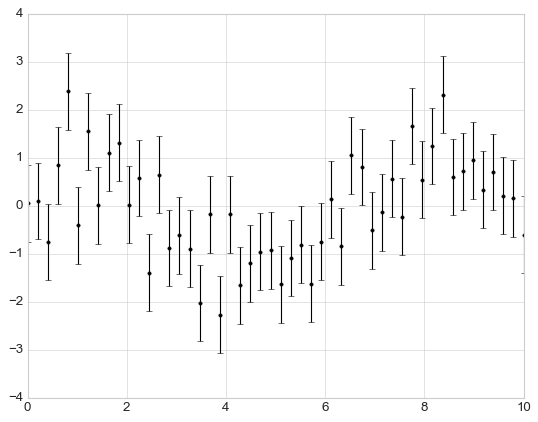

In [158]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

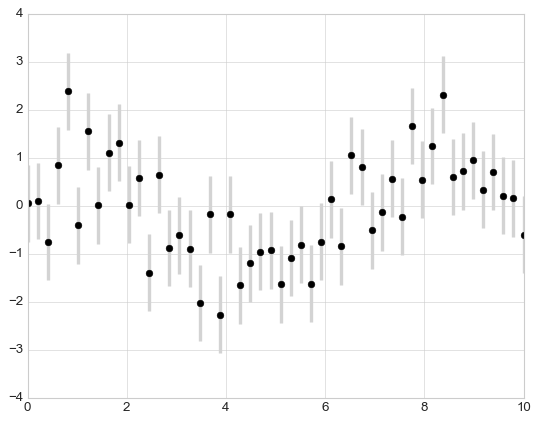

In [159]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

## 밀도 플롯과 등고선 플롯

### 3차원 함수 시각화하기

In [163]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [164]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y) # 격자 생성
Z = f (X, Y)

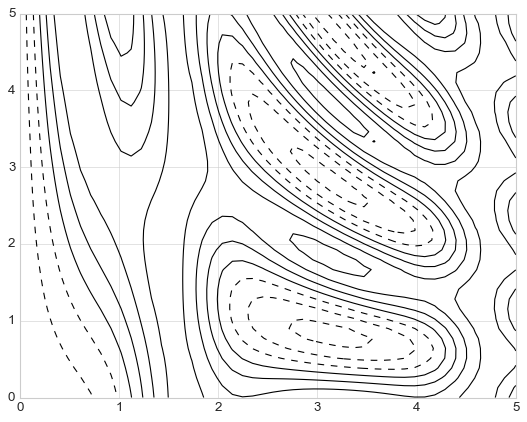

In [165]:
plt.contour(X, Y, Z, colors='black');
# 단색이 사용되면 음수 값은 점선, 양수 값은 실선으로 표시

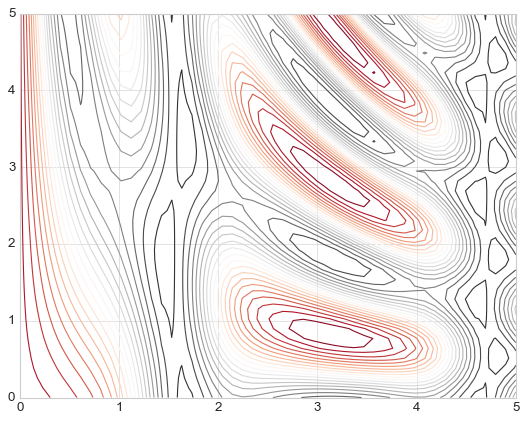

In [166]:
# cmap 인수로 색상표를 지정해 선에 색 지정
# 데이터 범위 내에 20개의 동일한 간격으로 더 많은 선
plt.contour(X, Y, Z, 20, cmap='RdGy');

In [168]:
# 중심화된 데이터에 좋은 방식 : RdGy(Red-Gray의 약어) 색상 지도를 선택
# plt.cm.<TAB> # 색상 지도 확인

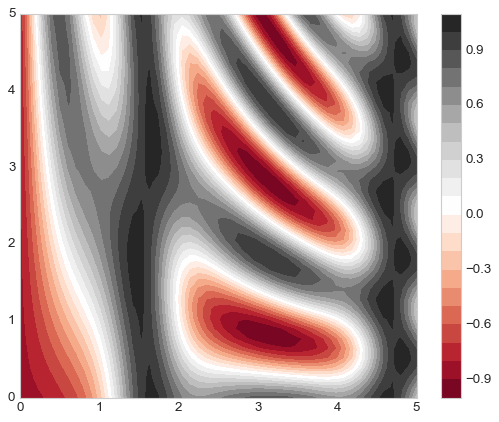

In [169]:
# plt.contourf() 함수를 사용하면 색으로 채워진 등고선 플롯
# plt.colorbar() 자동으로 플롯의 색상 정보 레이블을 나타내는 축을 추가
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

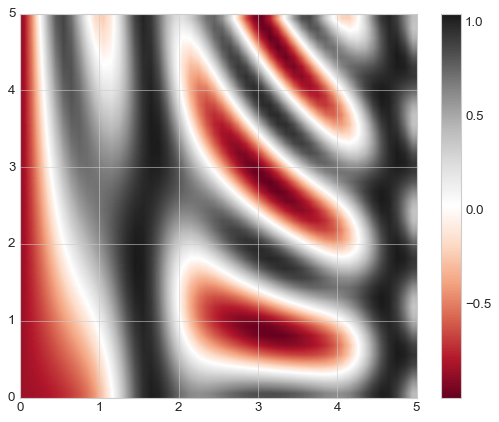

In [173]:
# 검은색 영역은 '높은 지점'이고 붉은색 영역은 '낮은 지점'
# 색상 단꼐가 불연속적, Matplotlib은 레벨의 단계마다 새로운 다각형을 렌더링해야 함
# 2차원 데이터 그리드를 이미지로 해석 : plt.imshow() 함수
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()
plt.gca().set_aspect('auto')

In [174]:
# imshow() 주의사항
# 1. plt.imshow()는 x와 y그리드를 받지 않으므로 플롯에 이미지의 extent를 직접 지정해야 함
# 2. plt.imshow()는 대부분의 등고선 플롯과 같이 원점이 왼쪽 아래가 아니라 왼쪽 위에 위치한 표준 이미지 배열 정의를 따름, 그리드 데이터를 보여줄 때는 이를 반드시 변경
# 3. plt.imshow()는 입력 데이터에 매칭하기 위해 자동으로 축의 가로세로 비율을 조정, plt.gca().set_aspect('auto')

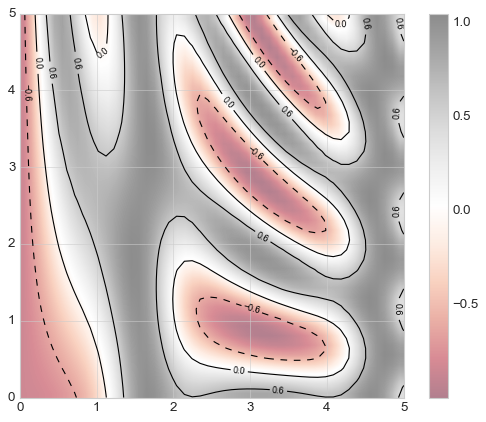

In [175]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar();

### 히스토그램, 구간화, 밀도

In [184]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

data = np.random.randn(1000)

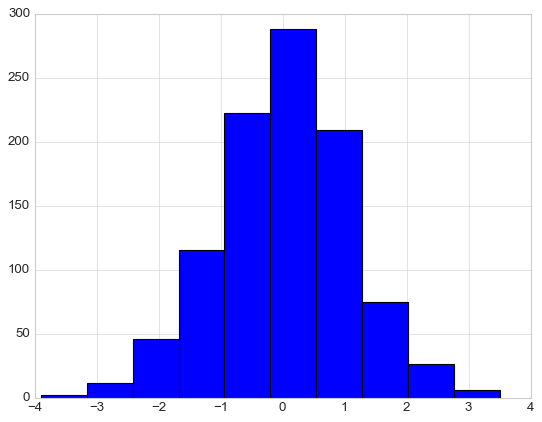

In [189]:
plt.hist(data); # default = 10개

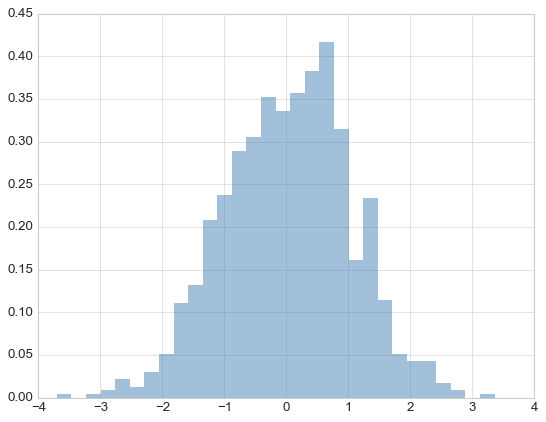

In [179]:
# 계산과 표현 모두 조정할 수 있는 많은 옵션을 제공
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

In [191]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

<Axes: >

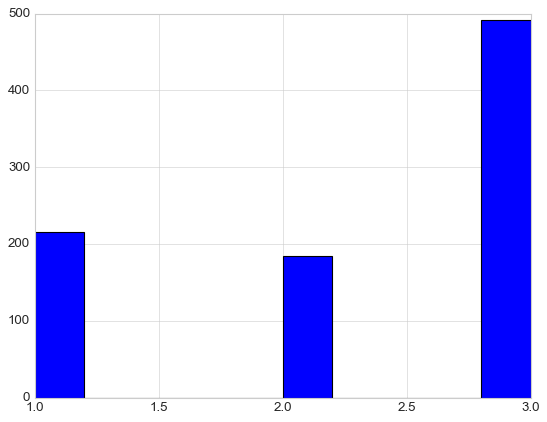

In [192]:
df.pclass.hist()

<Axes: >

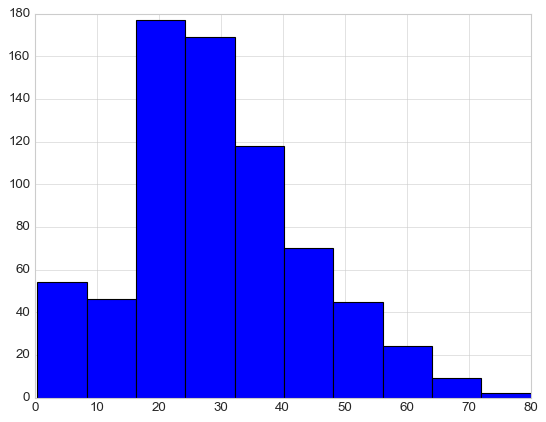

In [193]:
df.age.hist()

In [198]:
iris = data
features.shape

(4, 150)

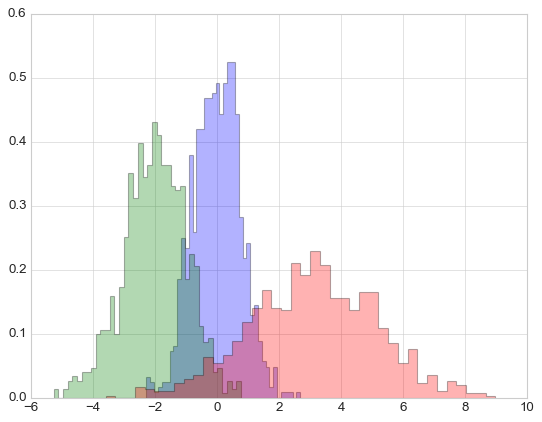

In [182]:
# 다양한 분포에 대한 히스토그램을 비교할 때는 histtype = 'stepfilled'와 몇몇 투명도 alpha를 결합하는 것이 매우 유용
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [183]:
# 이 히스토그램을 계산만 하고 표시할 생각은 없다면(특정 구간에 해당하는 점의 개수를 셈) np.histogram() 함수를 사용
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 12 181 476 304  27]


### 2차원 히스토그램과 구간화

In [186]:
# 숫자 선을 구간 (bin)으로 나누어 1차원에 히스토그램을 만드는 것처럼 점을 2차원 구간에 나누어 2차원에서도 히스토그램을 만들 수 있음
# 다변량 가우스 분포를 띄는 x와 y 배열을 정의
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

+ plt.hist2d: 2차원 히스토그램

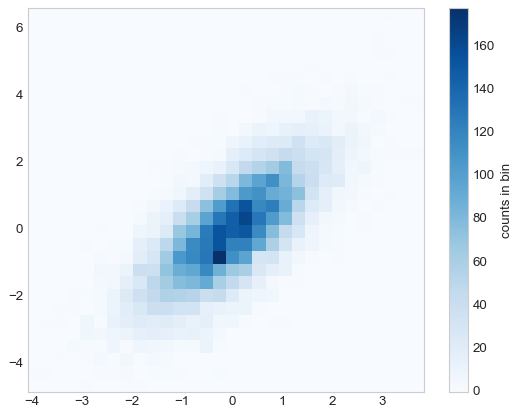

In [187]:
# Matplotlib의 plt.hist2d 함수를 사용
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [188]:
# plt.hist2d는 플롯과 구간화를 세밀하게 조정하는 다양한 추가 옵션
# plt.hist2d는 np.histogram2d에 대응
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
# 2차원보다 큰 차원에서 이 히스토그램 구간화를 일반화하는 것은 np.histogramdd 함수 참고

+ plt.hexbin: 육각형 구간화

+ 커널 밀도 추정

### 플롯 범례 맞춤 변경하기

In [199]:
# 플롯 범례는 다양한 플롯 요소에 레이블을 할당해 시각화에 의미를 부여

In [200]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [201]:
%matplotlib inline
import numpy as np

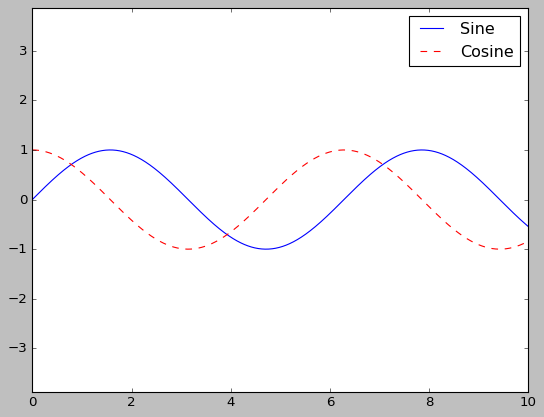

In [203]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

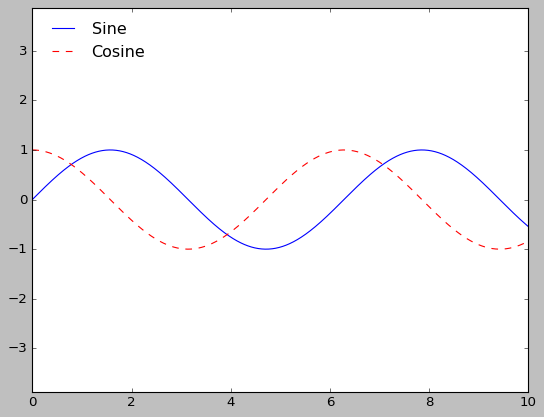

In [204]:
# 범례 맞춤 변경
# 범례 테두리 없애고 그 위치를 지정 가능
ax.legend(loc='upper left', frameon=False)
fig

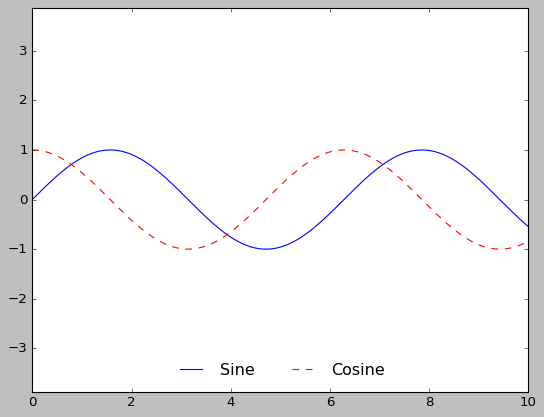

In [205]:
# 범례에 사용되는 열의 개수를 지정 ncol 명령어 사용
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

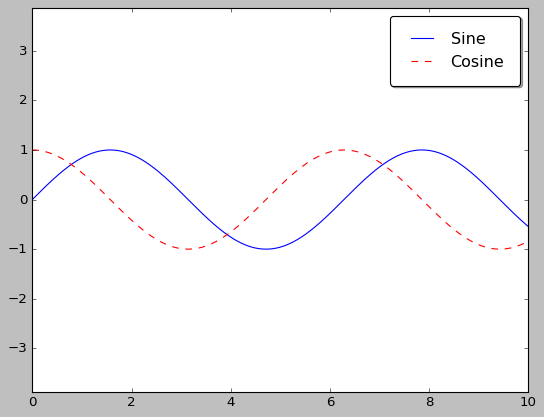

In [206]:
# 둥근 모서리 박스(fancybox)를 테두리로 사용하거나 음영을 추가하고 테두리의 투명도(alpha)를 변경하거나 텍스트 굵기를 변경 가능
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### 범례에 사용할 요소 선택하기

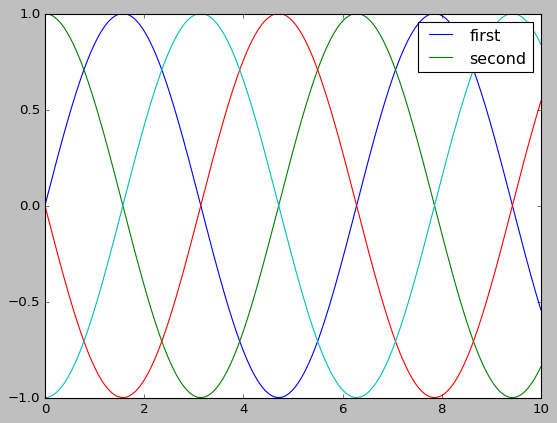

In [207]:
# plot 명령어가 반환하는 객체를 사용해 어떤 요소와 레이블을 범례에 나타나게 할지 조정
# plt.plot() 명령어는 한 번에 여러 라인을 만들 수 있고 만들어진 라인 인스턴스의 목록을 반환
# 이를 plt.legend() 에 전달하면 지정하고자 하는 레이블과 함께 무엇을 식별할 것인지 알려줌
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# 라인은 plt.line2D 인스턴스의 목록이다.
plt.legend(lines[:2], ['first', 'second']);

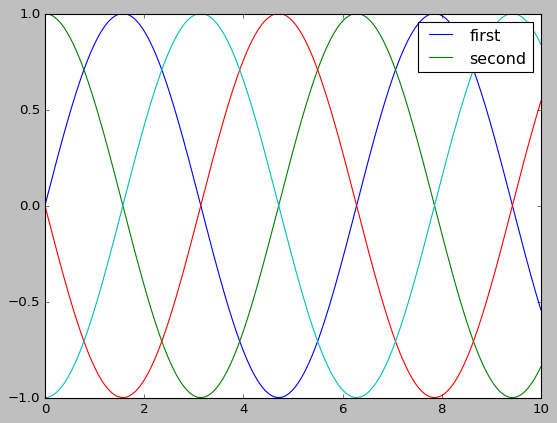

In [208]:
# 일반적으로 범례에 보여주고 싶은 플롯 요소에 레이블을 적용하는 첫 번째 방법이 대체로 더 명확
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

In [209]:
# 기본적으로 범례는 label 속성 집합을 가지지 않은 요소는 모두 무시

### 점 크기에 대한 범례

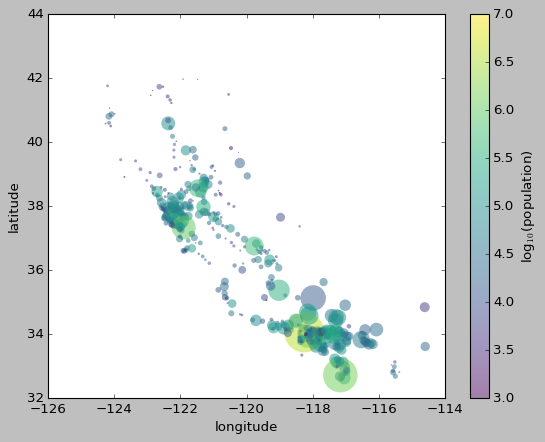

In [214]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# 관심 있는 데이터 추출
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 레이블은 없지만 크기와 색상을 사용해 점을 뿌림
plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis', s=area, linewidth=0, alpha=0.5)
# 축의 비율 자동으로 설정
plt.gca().set_aspect('auto')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 범례 생성
# 원하는 크기와 레이블로 빈 리스트를 플로팅
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')

### 색상 막대 맞춤 변경하기

In [215]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [216]:
%matplotlib inline
import numpy as np

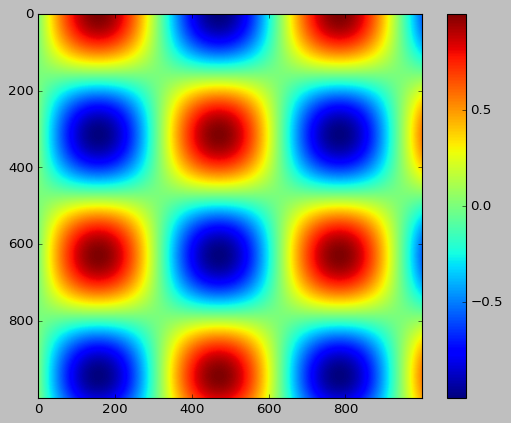

In [217]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

### 색상 막대 맞춤 변경하기

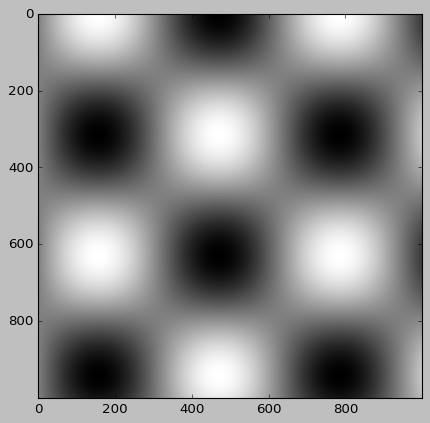

In [220]:
# cmap 인수를 사용해 색상 지도를 지정 가능
plt.imshow(I, cmap='gray');

+ 색상 지도 선택하기

In [221]:
# 세 가지 다른 범주가 있음
# 1. 순차적 색상 지도
# 2. 발산적 색상 지도
# 3. 정성적 색상 지도

In [223]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """색상 지도의 회색 조 버전을 반환"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    # RGBA를 감지할 수 있는 회색 조 밝기로 전환
    # 비교 : http://alienryderflex.com/hsp.html
    RGB_weight = [0.299,]

### 예제: 손으로 쓴 숫자

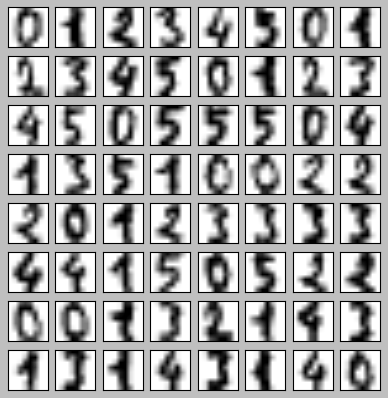

In [225]:
# 0~5까지 숫자의 이미지를 적재하고 그중 몇 가지를 시각화
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [229]:
# IsoMap을 사용해 숫자를 2차원에 사영
from sklearn.manifold import Isomap
# Isomap 모델 생성 및 학습
iso = Isomap(n_neighbors=10)  # n_neighbors 값을 조정
X_iso = iso.fit_transform(digits.data)

# iso = Isomap(n_components=2)
# projection = iso.fit_transform(digits.data)

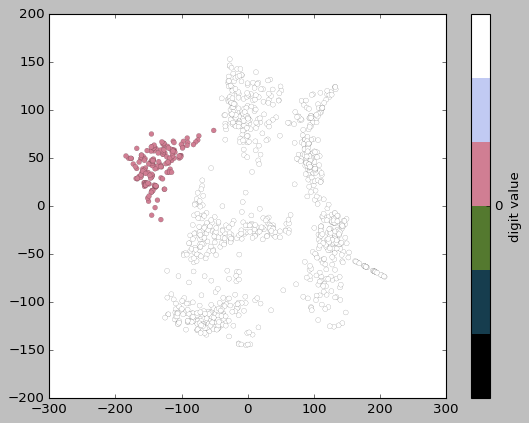

In [231]:
# 결과 플롯 그리기
from matplotlib.colors import ListedColormap

cmap = ListedColormap(plt.cm.cubehelix(np.linspace(0, 1, 6)))
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target, cmap=cmap)
# plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 0.5)